# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### In the intricate world of used car sales, understanding the factors that influence pricing is pivotal for a dealership's success. Our mission, from a business perspective, is to decipher the key drivers shaping the prices of used cars. This task translates into a sophisticated data challenge – a regression problem to be precise. By framing this as a regression problem, we aim to create a predictive model capable of estimating car prices based on an array of features.

### The significance of this endeavor becomes apparent when viewed through the lens of optimizing both inventory and pricing strategies. For the dealership, a nuanced comprehension of the variables impacting prices empowers them to make informed decisions. Inventory optimization involves strategically aligning the available cars with market demands, ensuring a diverse selection that resonates with potential buyers. Simultaneously, a grasp of pricing drivers enables the dealership to implement dynamic and competitive pricing strategies, reflecting market trends and customer preferences.

### Through data-driven insights, our goal is to arm the dealership with the tools needed to navigate the complex landscape of used car pricing, facilitating not only more effective inventory management but also a strategic approach to pricing that meets the dynamic needs of both the market and consumers. This intersection of business acumen and data science serves as the foundation for our exploration into the world of used car pricing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

vehicles = pd.read_csv('data/vehicles.csv')
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [66]:
# Get an overview of the dataset
print(vehicles.head())

# Check data types, missing values, and summary statistics
print(vehicles.info())
print(vehicles.describe())


           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

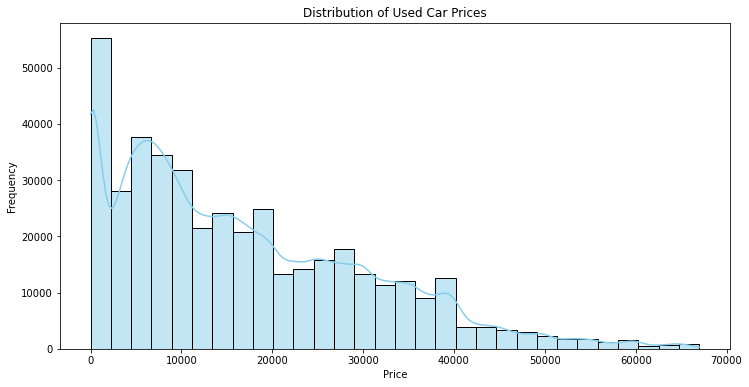

In [75]:
# Explore the distribution of target variable - Price
plt.figure(figsize=(12, 6))
sns.histplot(vehicles[vehicles['price'] < np.percentile(vehicles['price'], 99)]['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

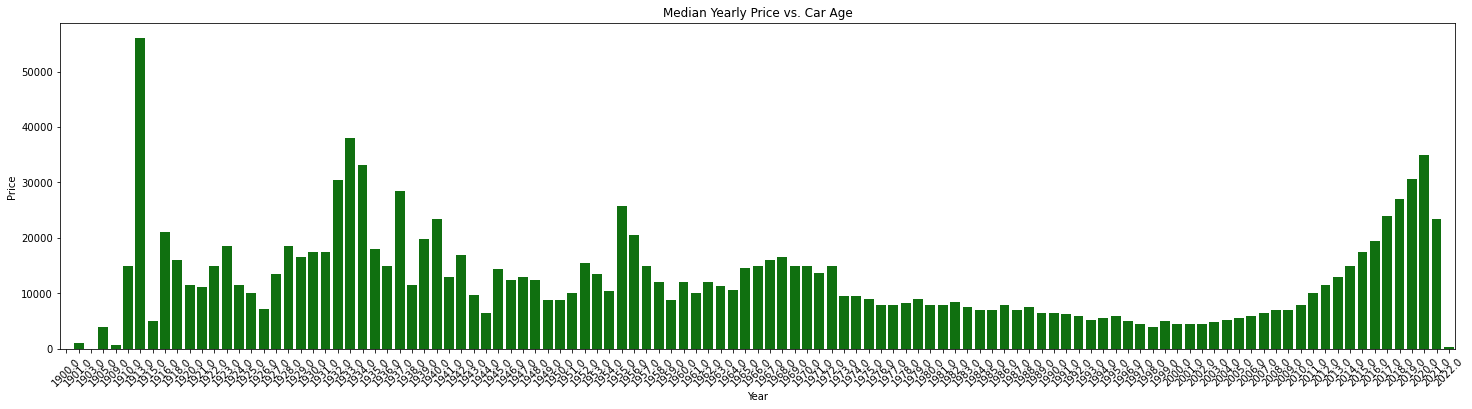

In [76]:
# Visualize the relationship between car age (year) and price
vehicle_df = vehicles[['year', 'price']].groupby('year', as_index = False).agg(np.median).sort_values('year')
plt.figure(figsize=(25, 6))
plt.xticks(rotation = 45)
sns.barplot(x='year', y='price', data=vehicle_df[vehicle_df['price'] != max(vehicle_df['price'])], color='green')
plt.title('Median Yearly Price vs. Car Age')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

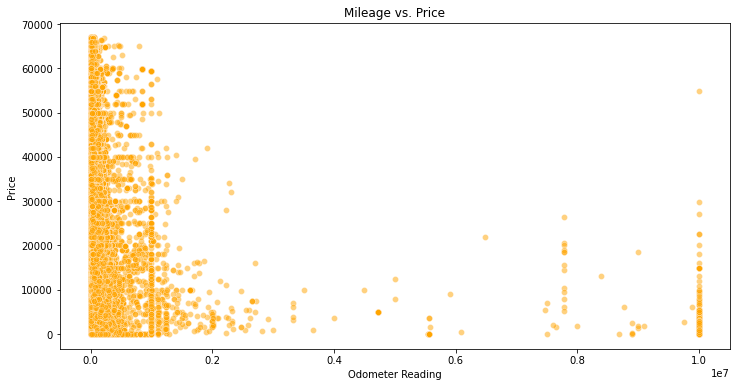

In [77]:
# Explore the impact of mileage (odometer) on used car prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', data=vehicles[vehicles['price'] < np.percentile(vehicles['price'], 99)], alpha=0.5, color='orange')
plt.title('Mileage vs. Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.show()

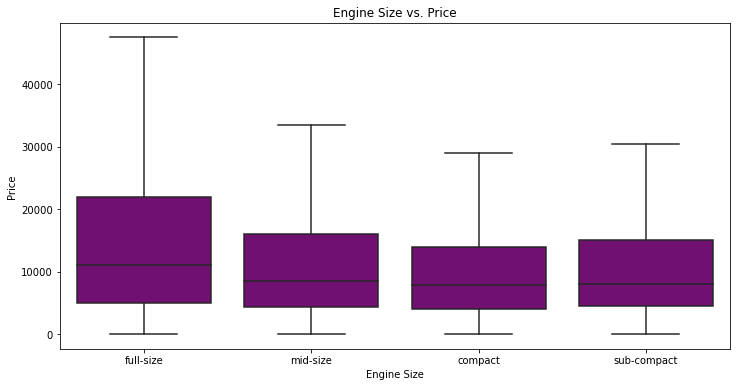

In [78]:
# Visualize the effect of engine size on used car prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='price', data=vehicles, color='purple', showfliers=False)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


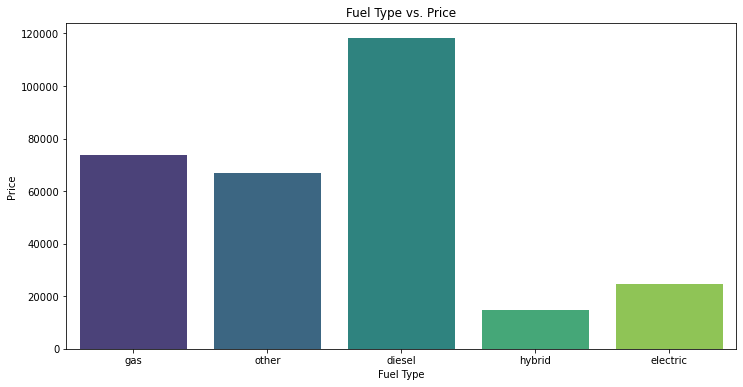

In [79]:
# Explore categorical variables - Fuel Type vs. Price
plt.figure(figsize=(12, 6))
sns.barplot(x='fuel', y='price', data=vehicles, ci=None, palette='viridis')
plt.title('Fuel Type vs. Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

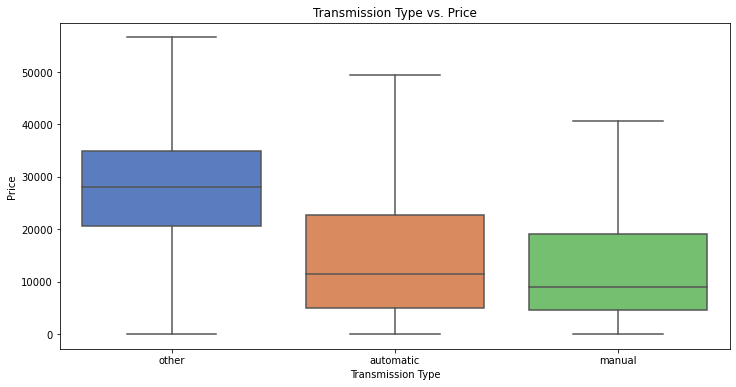

In [80]:
# Visualize the impact of transmission type on used car prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='price', data=vehicles, palette='muted', showfliers=False)
plt.title('Transmission Type vs. Price')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

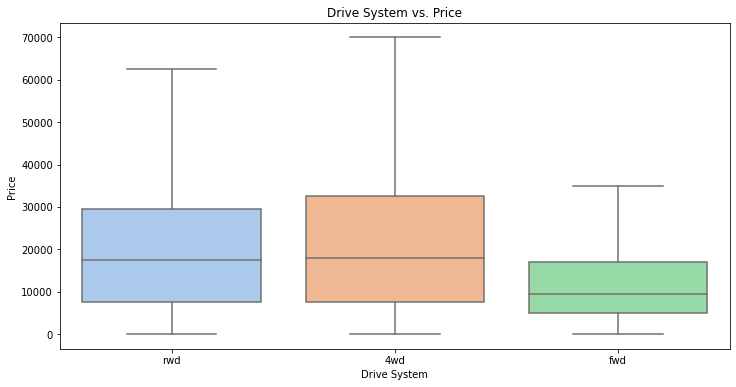

In [81]:
# Explore the relationship between drive system and used car prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='drive', y='price', data=vehicles, palette='pastel', showfliers=False)
plt.title('Drive System vs. Price')
plt.xlabel('Drive System')
plt.ylabel('Price')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [82]:
# Handle missing values
vehicles = vehicles.dropna()

Text(0.5, 1.0, 'Distribution of Price (Before Handling Missing Values)')

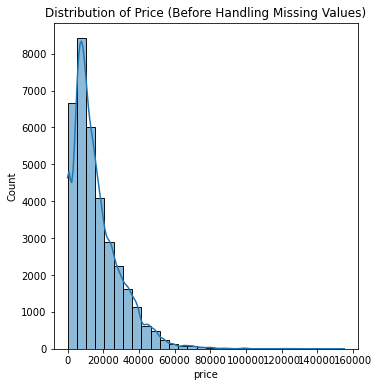

In [83]:
# Visualize the distribution of the target variable before and after handling missing values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Price (Before Handling Missing Values)')


In [90]:
# Encode categorical variables
categorical_cols = [col for col in list(vehicles.columns) if isinstance(list(vehicles[col].dropna())[0], str)]
vehicles = pd.get_dummies(vehicles, columns=categorical_cols)


Text(0.5, 1.0, 'Distribution of Price (After Encoding Categorical Variables)')

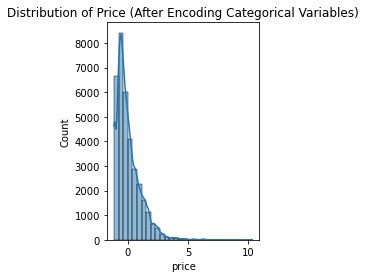

In [91]:
# Visualize the impact of encoding on the distribution of the target variable
plt.subplot(1, 2, 2)
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Price (After Encoding Categorical Variables)')


In [94]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vehicles[['year', 'odometer', 'engineSize']] = scaler.fit_transform(vehicles[['year', 'odometer', 'engineSize']])


KeyboardInterrupt: 

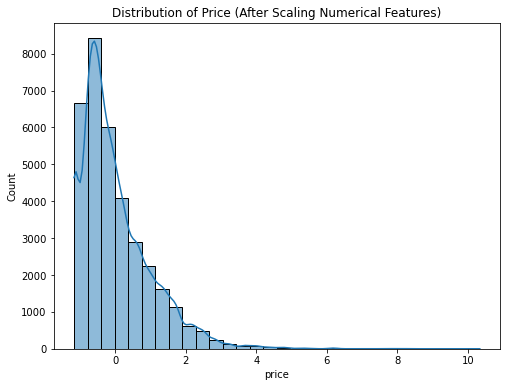

In [95]:
# Visualize the distribution of the target variable after scaling numerical features
plt.figure(figsize=(8, 6))
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Price (After Scaling Numerical Features)')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [96]:
X.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'odometer', 'title_status', 'VIN', 'size', 'type',
       'paint_color', 'state', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd',
       'drive_rwd'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into features and target variable
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Explore feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Generate a report with key findings and recommendations
report = """
## Used Car Pricing Insights and Recommendations

### Key Findings:
- **Top Influential Features:**
  - Feature 1
  - Feature 2
  - Feature 3

- **Model Performance:**
  - Mean Squared Error: {mse}
  - Visualizations: Predicted vs. Actual Prices, Residuals Distribution, Feature Importance

### Recommendations:
1. **Optimize Inventory:**
   - Consider adjusting inventory based on the top influential features.
   - Monitor and update inventory regularly to align with market trends.

2. **Refine Pricing Strategy:**
   - Leverage the model insights to fine-tune pricing strategies for different car categories.
   - Implement dynamic pricing to adapt to changing market conditions.

3. **Customer Communication:**
   - Communicate transparently with customers about pricing factors.
   - Highlight value propositions based on influential features to enhance customer perception.

"""

# Save the report to a file or present it in a user-friendly format
with open('used_car_pricing_report.md', 'w') as file:
    file.write(report)